Juntamente com o outro notebook, para esse status, decidimos simular o comportamento e as análises que conteriam na nossa dashboard.
Para isto, elaboramos um dataset levando como base os dados que poderiam ser extraídos do nosso bot, a partir das respostas dos próprios ouvintes dos podcasts.

O intuito que desejamos, é passar uma análise para que o podcaster possa gerar possíveis insights de melhorias ou algo relacionado ao seu podcast.

A priori fizemos algumas análises simples de dados, para entendermos qual era o nicho do podcast e seu público alvo, se ele estava indo bem ou não dependendo das suas notas, etc.

Logo após, utilizamos de 4 técnicas de machine learning, sendo elas a de KNN, Random forest, Árvores de decisão e SVM(Support Vector Machine).
Para analisar qual das técnicas seria a melhor, levamos como base a accuracy, a precisão, recall e o f1-score.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dataset = pd.read_csv('podcast.csv')

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   idade                             1000 non-null   int64
 1   Gênero                            1000 non-null   int64
 2   Média de hrs que escuta podcast   1000 non-null   int64
 3   Nota que da ao podcast preferido  1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [3]:
dataset.head()

,idade,Gênero,Média de hrs que escuta podcast,Nota que da ao podcast preferido
0,26,0,1,6
1,49,0,3,9
2,26,0,2,1
3,64,1,2,4
4,50,1,4,10


In [4]:
dataset.describe()

,idade,Gênero,Média de hrs que escuta podcast,Nota que da ao podcast preferido
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,43.10700,0.521000,3.034000,4.991000
std,15.84963,0.499809,2.065699,3.185446
min,16.00000,0.000000,0.000000,0.000000
25%,30.00000,0.000000,1.000000,2.000000
50%,44.00000,1.000000,3.000000,5.000000
75%,57.00000,1.000000,5.000000,8.000000
max,70.00000,1.000000,6.000000,10.000000


## Nessa visualização desejamos ter uma noção de qual era a faixa etária que mais consumia podcast

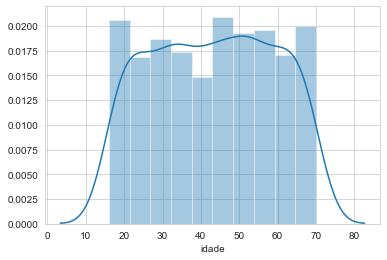

In [5]:
data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8
sns.set_style('whitegrid')
sns.distplot(dataset['idade'].dropna())

C:\Users\Jean\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


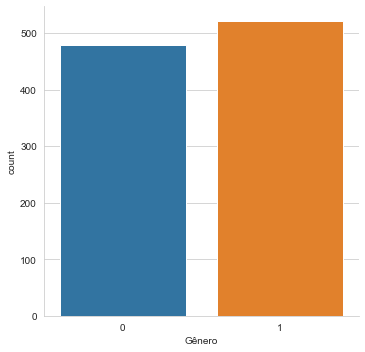

In [6]:
sns.factorplot('Gênero', data=dataset, kind='count')

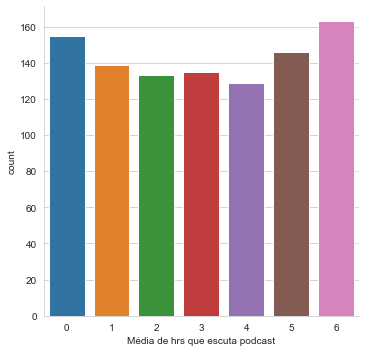

In [7]:
sns.factorplot('Média de hrs que escuta podcast', data=dataset, kind='count')

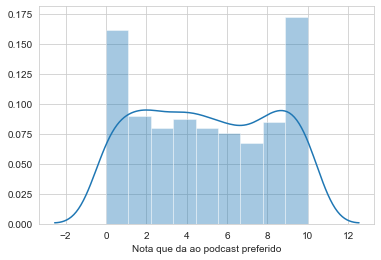

In [8]:
data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8
sns.set_style('whitegrid')
sns.distplot(dataset['Nota que da ao podcast preferido'].dropna())

In [9]:
dataset['idade'].value_counts(normalize=True)

45    0.029
62    0.027
21    0.023
65    0.023
51    0.023
54    0.022
17    0.022
44    0.022
57    0.022
52    0.022
70    0.021
29    0.021
36    0.021
39    0.021
50    0.021
43    0.021
56    0.021
24    0.020
32    0.020
34    0.020
49    0.020
22    0.020
25    0.020
33    0.020
19    0.019
67    0.019
64    0.019
53    0.018
30    0.018
31    0.017
28    0.017
68    0.017
35    0.017
16    0.017
60    0.017
63    0.017
41    0.017
59    0.017
37    0.016
69    0.016
23    0.016
38    0.016
18    0.015
20    0.015
48    0.015
26    0.015
46    0.014
42    0.013
40    0.013
58    0.013
47    0.012
61    0.012
66    0.012
55    0.011
27    0.008
Name: idade, dtype: float64

### Dividimos o nosso dataset em treino e teste, para que assim podessemos aplicar os modelos

In [10]:
X= dataset.drop('Nota que da ao podcast preferido', axis=1)
y= dataset['idade']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25)

### Utilizando do modelo de Random forest, Árvore de decisão, SVM e KNN, vamos medir a sua performances para os valores inputados

In [11]:
tree= DecisionTreeClassifier(random_state=24)
forest= RandomForestClassifier(random_state=24)

models= [tree, forest]

for model in models:
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    clf_report= classification_report(y_test, y_pred) 
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(clf_report)
    print("\n")

The accuracy of model DecisionTreeClassifier is 1.00
              precision    recall  f1-score   support

          16       1.00      1.00      1.00         6
          17       1.00      1.00      1.00         5
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         7
          20       1.00      1.00      1.00         7
          21       1.00      1.00      1.00         4
          22       1.00      1.00      1.00         5
          23       1.00      1.00      1.00         2
          24       1.00      1.00      1.00         2
          25       1.00      1.00      1.00         6
          26       1.00      1.00      1.00         4
          27       1.00      1.00      1.00         1
          28       1.00      1.00      1.00         5
          29       1.00      1.00      1.00         7
          30       1.00      1.00      1.00         9
          31       1.00      1.00      1.00         6
          32       1.00     

C:\Users\Jean\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jean\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
knn= KNeighborsClassifier()
svm= SVC(random_state=24)

models= [knn, svm]

for model in models:
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    clf_report= classification_report(y_test, y_pred) 
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(clf_report)
    print("\n")

The accuracy of model KNeighborsClassifier is 0.80
              precision    recall  f1-score   support

          16       1.00      0.83      0.91         6
          17       0.83      1.00      0.91         5
          18       1.00      1.00      1.00         1
          19       0.78      1.00      0.88         7
          20       1.00      0.71      0.83         7
          21       0.80      1.00      0.89         4
          22       0.80      0.80      0.80         5
          23       1.00      0.50      0.67         2
          24       1.00      1.00      1.00         2
          25       0.86      1.00      0.92         6
          26       0.75      0.75      0.75         4
          27       0.00      0.00      0.00         1
          28       0.80      0.80      0.80         5
          29       0.50      0.71      0.59         7
          30       0.62      0.56      0.59         9
          31       1.00      0.67      0.80         6
          32       0.80      1

C:\Users\Jean\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jean\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jean\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Com base na accuracy, conseguimos delimitar que o modelo de Árvore de decisão foi o melhor, tendo em vista a sua accuracy de 1.00.

### O que vem logo atrás com o segundo melhor desempenho é o de KNN, seguido por Random forest e SVM.

# Comparações feitas através da validação cruzada

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X_train, y_train, cv=5)
scores

array([1., 1., 1., 1., 1.])

In [15]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


In [16]:
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(forest, X_train, y_train, cv=5)
scores2

array([0.58666667, 0.57333333, 0.52      , 0.58666667, 0.55333333])

In [17]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

0.56 accuracy with a standard deviation of 0.03


In [18]:
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(knn, X_train, y_train, cv=5)
scores3

array([0.7       , 0.70666667, 0.71333333, 0.75333333, 0.67333333])

In [19]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))

0.71 accuracy with a standard deviation of 0.03


In [20]:
from sklearn.model_selection import cross_val_score
scores4 = cross_val_score(svm, X_train, y_train, cv=5)
scores4

array([0.16      , 0.11333333, 0.2       , 0.15333333, 0.17333333])

In [21]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores4.mean(), scores4.std()))

0.16 accuracy with a standard deviation of 0.03
